<a href="https://colab.research.google.com/github/MansiiKhandekar/MansiiKhandekar/blob/main/Mansi_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise: Exploring data (Exploratory Data Analysis)

## Context:
- The data includes 120 years (1896 to 2016) of Olympic games with information about athletes and medal results.
- We'll focus on practicing the summary statistics and data visualization techniques that we've learned in the course.
- In general, this dataset is popular to explore how the Olympics have evolved over time, including the participation and performance of different genders, different countries, in various sports and events.

- Check out the original source if you are interested in using this data for other purposes (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

## Dataset Description:

We'll work on the data within athlete_events.csv.

Each row corresponds to an individual athlete competing in an individual Olympic event.

The columns are:
- **ID**: Unique number for each athlete
- **Name**: Athlete's name
- **Sex**: M or F
- **Age**: Integer
- **Height**: In centimeters
- **Weight**: In kilograms
- **Team**: Team name
- **NOC**: National Olympic Committee 3-letter code
- **Games**: Year and season
- **Year**: Integer
- **Season**: Summer or Winter
- **City**: Host city
- **Sport**: Sport
- **Event**: Event
- **Medal**: Gold, Silver, Bronze, or NA

## Objective:
   - Examine/clean the dataset
   - Explore distributions of single numerical and categorical features via statistics and plots
   - Explore relationships of multiple features via statistics and plots

We are only going to explore part of the dataset, please feel free to explore more if you are interested.

### 1. Import the libraries `Pandas` and `Seaborn`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Import the data from the csv file as DataFrame `olympics`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
olympics = pd.read_csv('/content/drive/MyDrive/athlete_events.csv')


### 3. Look at the info summary, head of the DataFrame

In [ ]:
olympics.head()
#olympics.sort_values(by='Height',ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 4. Impute the missing data

#### Use `IterativeImputer` in `sklearn` to impute based on columns `Year`, `Age`, `Height`, `Weight`

##### Import libraries

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `Year`, `Age`, `Height`, `Weight`
The column `Year` doesn't have mssing values, but we include it since it might be helpful modeling the other three columns. The age, height, and weight could change across years.

In [ ]:
df1=olympics[['Year','Age','Height','Weight']]

##### Create an `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [ ]:
imputer = IterativeImputer(max_value=227.0,min_value=0.0, random_state=42)

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [ ]:
df2=imputer.fit_transform(df1)


##### Assign the imputed array back to the original DataFrame's columns

In [ ]:
olympics[['Year','Age','Height','Weight']]=df2

#### Fill the missing values in the column `Medal` with string of 'NA'

In [ ]:
olympics['Medal'].fillna('NA',inplace=True)

<ipython-input-11-a9b2e886a45f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics['Medal'].fillna('NA',inplace=True)


#### Double check that the columns are all imputed

In [ ]:
olympics.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


### 5. Use the `describe` method to check the numerical columns

In [ ]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.600403,175.280012,70.952868,1978.378480
std,39022.286345,6.286884,9.348525,12.804718,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000
50%,68205.000000,25.000000,174.985428,70.064748,1988.000000
75%,102097.250000,28.000000,180.000000,77.000000,2002.000000
max,135571.000000,97.000000,227.000000,214.000000,2016.000000


### 6. Plot the histograms of the numerical columns using `Pandas`

Text(0, 0.5, 'Values')

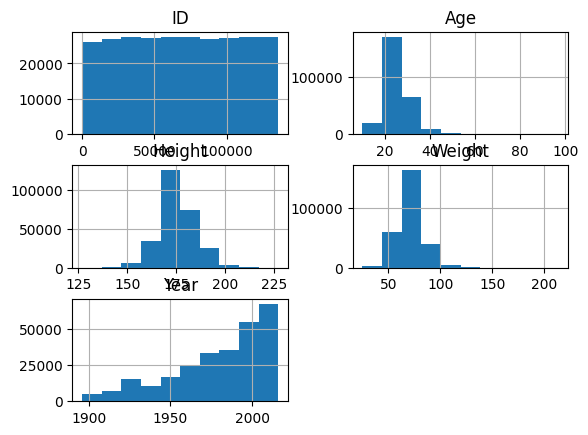

In [ ]:
olympics.hist()
plt.xlabel("Values")
plt.ylabel("Values")

### 7. Plot the histogram with a rug plot of the column `Age` using `Seaborn`, with both 20 and 50 bins

<Axes: xlabel='Age', ylabel='Count'>

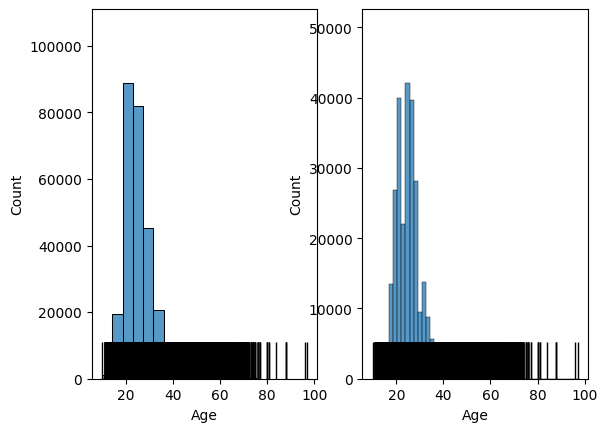

In [ ]:
plt.subplot(1,2,1)
sns.histplot(olympics['Age'],bins=20,kde=False)
sns.rugplot(olympics['Age'], color="black", height=0.1)
plt.subplot(1,2,2)
sns.histplot(olympics['Age'],bins=50,kde=False)
sns.rugplot(olympics["Age"], color="black", height=0.1)

### 8. Plot the boxplot of the column `Age` using `Pandas`

<Axes: >

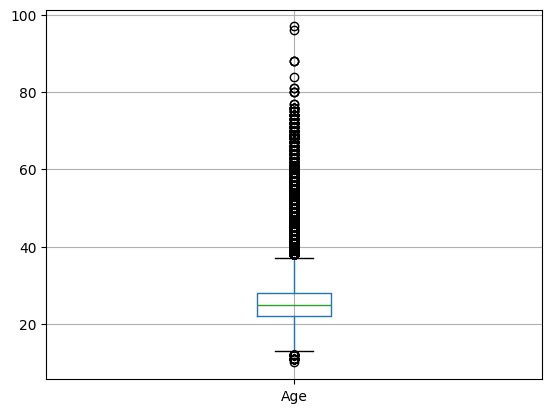

In [ ]:
olympics.boxplot(column='Age')

### 9. Plot the boxplot of the column `Age` using `Seaborn`

<Axes: ylabel='Age'>

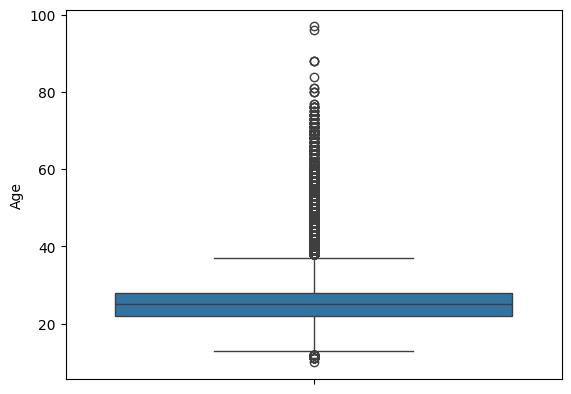

In [ ]:
sns.boxplot(olympics['Age'])

### 10. Calculate the first quartile, third quartile, and IQR of the column `Age`

In [ ]:
q1=olympics['Age'].quantile(0.25)
q3=olympics['Age'].quantile(0.75)
q=q3-q1
print("First Quantile: ",q1)
print("Third Quantile: ",q3)
print("IQR: ",q)


First Quantile:  22.0
Third Quantile:  28.0
IQR:  6.0


### 11. Print out the lower and upper thresholds for outliers based on IQR for the column `Age`

In [ ]:
lower_threshold=q1-(1.5*q)
upper_threshold=q3+(1.5*q)
print("Lower Threshold: ",lower_threshold)
print("Upper Threshold: ",upper_threshold)

Lower Threshold:  13.0
Upper Threshold:  37.0


### 12. What are the `Sport` for the athletes of really young age

#### Filter for the column `Sport` when the column `Age` has outliers of lower values

In [ ]:
olympics[olympics['Age']<lower_threshold]['Sport']

,Sport
9648,Swimming
9649,Swimming
9650,Swimming
43468,Figure Skating
46955,Rowing
50291,Swimming
50292,Swimming
50293,Swimming
50294,Swimming
60911,Figure Skating


#### Look at the unique values of `Sport` and their counts when `Age` are low-valued outliers

Did you find any sports popular for really young athletes?

In [ ]:
olympics[olympics['Age']<lower_threshold]['Sport'].unique()

array(['Swimming', 'Figure Skating', 'Rowing', 'Gymnastics', 'Athletics',
       'Diving'], dtype=object)

### 13. What are the `Sport` for the athletes of older age

#### Filter for the column `Sport` when the column `Age` has outliers of higher values

In [ ]:
olympics[olympics['Age']>upper_threshold]['Sport']

,Sport
58,Art Competitions
89,Sailing
90,Sailing
124,Shooting
126,Shooting
...,...
270955,Art Competitions
270970,Athletics
270971,Athletics
270972,Athletics


#### Look at the unique values of `Sport` and their counts when `Age` are high-valued outliers
Did you find any sports popular for older age athletes?

In [ ]:
olympics[olympics['Age']>upper_threshold]['Sport'].unique()

array(['Art Competitions', 'Sailing', 'Shooting', 'Handball', 'Golf',
       'Archery', 'Fencing', 'Hockey', 'Luge', 'Canoeing', 'Volleyball',
       'Beach Volleyball', 'Athletics', 'Equestrianism', 'Tennis',
       'Curling', 'Bobsleigh', 'Weightlifting', 'Ice Hockey', 'Triathlon',
       'Rowing', 'Swimming', 'Polo', 'Snowboarding', 'Cricket',
       'Skeleton', 'Basketball', 'Wrestling', 'Diving', 'Biathlon',
       'Gymnastics', 'Cycling', 'Figure Skating', 'Water Polo',
       'Table Tennis', 'Cross Country Skiing', 'Synchronized Swimming',
       'Football', 'Ski Jumping', 'Tug-Of-War', 'Alpinism',
       'Modern Pentathlon', 'Alpine Skiing', 'Baseball', 'Jeu De Paume',
       'Judo', 'Softball', 'Speed Skating', 'Trampolining', 'Badminton',
       'Motorboating', 'Freestyle Skiing', 'Boxing', 'Nordic Combined',
       'Roque', 'Racquets', 'Croquet', 'Rugby'], dtype=object)

### 14. Check for the number of unique values in each column

In [ ]:
olympics.nunique()

,0
ID,135571
Name,134732
Sex,2
Age,785
Height,2476
Weight,3565
Team,1184
NOC,230
Games,51
Year,35


### 15. Use the `describe` method to check the non-numerical columns

In [ ]:
olympics.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116
unique,134732,2,1184,230,51,2,42,66,765,4
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,NA
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,231333


### 16. Apply the `value_counts` method for each non-numerical column, check for their unique values and counts

In [ ]:
olympics.select_dtypes(include='object').nunique()

,0
Name,134732
Sex,2
Team,1184
NOC,230
Games,51
Season,2
City,42
Sport,66
Event,765
Medal,4


### 17. Check the first record within the dataset for each Olympic `Sport`

*Hint: sort the DataFrame by `Year`, then groupby by `Sport`*

In [ ]:
olympics.groupby('Sport').sum().sort_values(by=['Year']).head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,107506,Hermann Schreiber,M,26.0,174.589861,71.098724,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold


### 18. What are the average `Age`, `Height`, `Weight` of female versus male Olympic athletes

In [ ]:
Male_avg_h=olympics[olympics['Sex']=='M']['Height'].mean()
Male_avg_a=olympics[olympics['Sex']=='M']['Age'].mean()
Male_avg_w=olympics[olympics['Sex']=='M']['Weight'].mean()
Female_avg_h=olympics[olympics['Sex']=='F']['Height'].mean()
Female_avg_a=olympics[olympics['Sex']=='F']['Age'].mean()
Female_avg_w=olympics[olympics['Sex']=='F']['Weight'].mean()
print("Male Average Height: ",Male_avg_h)
print("Male Average Age: ",Male_avg_a)
print("Male Average Weight: ",Male_avg_w)
print("Female Average Height: ",Female_avg_h)
print("Female Average Age: ",Female_avg_a)
print("Female Average Weight: ",Female_avg_w)

Male Average Height:  177.85916522281255
Male Average Age:  26.30249648616838
Male Average Weight:  74.74057358382841
Female Average Height:  168.47603349679252
Female Average Age:  23.74823442365967
Female Average Weight:  60.96064871228386


### 19. What are the minimum, average, maximum `Age`, `Height`, `Weight` of athletes in different `Year`

In [ ]:
avg_age=olympics.groupby('Year')['Age'].mean()
min_age=olympics.groupby('Year')['Age'].min()
max_age=olympics.groupby('Year')['Age'].max()
avg_h=olympics.groupby('Year')['Height'].mean()
min_h=olympics.groupby('Year')['Height'].min()
max_h=olympics.groupby('Year')['Height'].max()
avg_w=olympics.groupby('Year')['Weight'].mean()
min_w=olympics.groupby('Year')['Weight'].min()
max_w=olympics.groupby('Year')['Weight'].max()
print("Minimum Age: ",min_age)
print("Average Age: ",avg_age)
print("Maximum Age: ",max_age)
print("Minimum Height: ",min_h)
print("Average Height: ",avg_h)
print("Maximum Height: ",max_h)
print("Minimum Weight: ",min_w)
print("Average Weight: ",avg_w)
print("Maximum Weight: ",max_w)

Minimum Age:  Year
1896.0    10.0
1900.0    13.0
1904.0    14.0
1906.0    13.0
1908.0    14.0
1912.0    13.0
1920.0    13.0
1924.0    11.0
1928.0    11.0
1932.0    11.0
1936.0    11.0
1948.0    12.0
1952.0    12.0
1956.0    12.0
1960.0    11.0
1964.0    12.0
1968.0    11.0
1972.0    12.0
1976.0    12.0
1980.0    13.0
1984.0    12.0
1988.0    11.0
1992.0    11.0
1994.0    13.0
1996.0    12.0
1998.0    14.0
2000.0    13.0
2002.0    15.0
2004.0    13.0
2006.0    14.0
2008.0    12.0
2010.0    15.0
2012.0    13.0
2014.0    15.0
2016.0    13.0
Name: Age, dtype: float64
Average Age:  Year
1896.0    25.364356
1900.0    28.454101
1904.0    26.867754
1906.0    27.272610
1908.0    27.061116
1912.0    27.528582
1920.0    28.861062
1924.0    28.101622
1928.0    28.728274
1932.0    32.002855
1936.0    27.506104
1948.0    28.407495
1952.0    26.165217
1956.0    25.949715
1960.0    25.187182
1964.0    24.948374
1968.0    24.263374
1972.0    24.318900
1976.0    23.850452
1980.0    23.734613
1984.0    2

### 20. What are the minimum, average, median, maximum `Age` of athletes for different `Season` and `Sex` combinations

In [ ]:
x=olympics.groupby(['Sex','Season'])['Age'].mean()
y=olympics.groupby(['Sex','Season'])['Age'].median()
z=olympics.groupby(['Sex','Season'])['Age'].min()
l=olympics.groupby(['Sex','Season'])['Age'].max()
print("Mean: ",x)
print("Median: ",y)
print("Min: ",z)
print("Max: ",l)

Mean:  Sex  Season
F    Summer    23.680377
     Winter    24.015736
M    Summer    26.464649
     Winter    25.512635
Name: Age, dtype: float64
Median:  Sex  Season
F    Summer    23.0
     Winter    24.0
M    Summer    25.0
     Winter    25.0
Name: Age, dtype: float64
Min:  Sex  Season
F    Summer    11.0
     Winter    11.0
M    Summer    10.0
     Winter    12.0
Name: Age, dtype: float64
Max:  Sex  Season
F    Summer    74.0
     Winter    48.0
M    Summer    97.0
     Winter    58.0
Name: Age, dtype: float64


### 21. What are the average `Age` of athletes, and numbers of unique `Team`, `Sport`, `Event`, for different `Season` and `Sex` combinations

In [ ]:
mean_a=olympics.groupby(['Sex','Season'])['Age'].mean()
uni_team=olympics.groupby(['Sex','Season'])['Team'].nunique()
uni_sport=olympics.groupby(['Sex','Season'])['Sport'].nunique()
uni_event=olympics.groupby(['Sex','Season'])['Event'].nunique()
print("Mean Age: ",mean_a)
print("Unique Teams: ",uni_team)
print("Unique Sports: ",uni_sport)
print("Unique Events: ",uni_event)

Mean Age:  Sex  Season
F    Summer    23.680377
     Winter    24.015736
M    Summer    26.464649
     Winter    25.512635
Name: Age, dtype: float64
Unique Teams:  Sex  Season
F    Summer     352
     Winter     144
M    Summer    1118
     Winter     214
Name: Team, dtype: int64
Unique Sports:  Sex  Season
F    Summer    40
     Winter    14
M    Summer    49
     Winter    17
Name: Sport, dtype: int64
Unique Events:  Sex  Season
F    Summer    214
     Winter     57
M    Summer    491
     Winter     67
Name: Event, dtype: int64


### 22. What are the average `Age`, `Height`, `Weight` of athletes, for different `Medal`, `Season`, `Sex` combinations

In [ ]:
a=olympics.groupby(['Sex','Season','Medal'])['Age'].mean()
b=olympics.groupby(['Sex','Season','Medal'])['Height'].mean()
c=olympics.groupby(['Sex','Season','Medal'])['Weight'].mean()
print("Mean Age: ",a)
print("Mean Height: ",b)
print("Mean Weight: ",c)

Mean Age:  Sex  Season  Medal 
F    Summer  Bronze    24.637527
             Gold      24.215093
             NA        23.547521
             Silver    24.296089
     Winter  Bronze    25.115578
             Gold      25.202636
             NA        23.855915
             Silver    25.240527
M    Summer  Bronze    26.382673
             Gold      26.501307
             NA        26.454123
             Silver    26.690500
     Winter  Bronze    26.387043
             Gold      26.606436
             NA        25.386328
             Silver    26.430566
Name: Age, dtype: float64
Mean Height:  Sex  Season  Medal 
F    Summer  Bronze    171.110734
             Gold      171.594933
             NA        168.283937
             Silver    171.310947
     Winter  Bronze    167.339042
             Gold      167.563734
             NA        167.281732
             Silver    167.916040
M    Summer  Bronze    179.283138
             Gold      179.803255
             NA        177.557135
       

### 23. Plot the scatterplot of `Height` and `Weight`

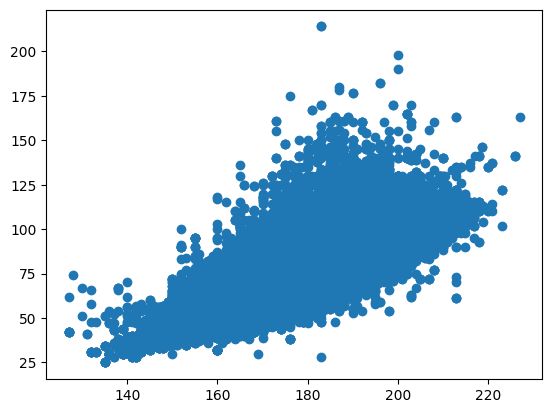

In [ ]:
plt.scatter(olympics['Height'],olympics['Weight'])

### 24. Plot the scatterplot of `Height` and `Weight`, using different colors and styles of dots for different `Sex`

<Axes: xlabel='Height', ylabel='Weight'>

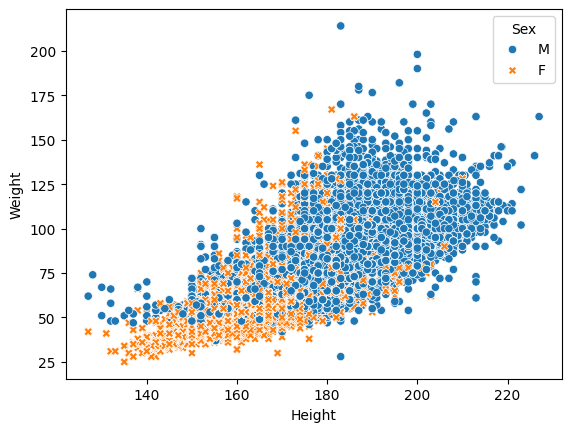

In [ ]:
sns.scatterplot(x=olympics['Height'],y=olympics['Weight'],hue=olympics['Sex'],style=olympics['Sex'])

### 25. Plot the pairwise relationships of `Age`, `Height`, `Weight`

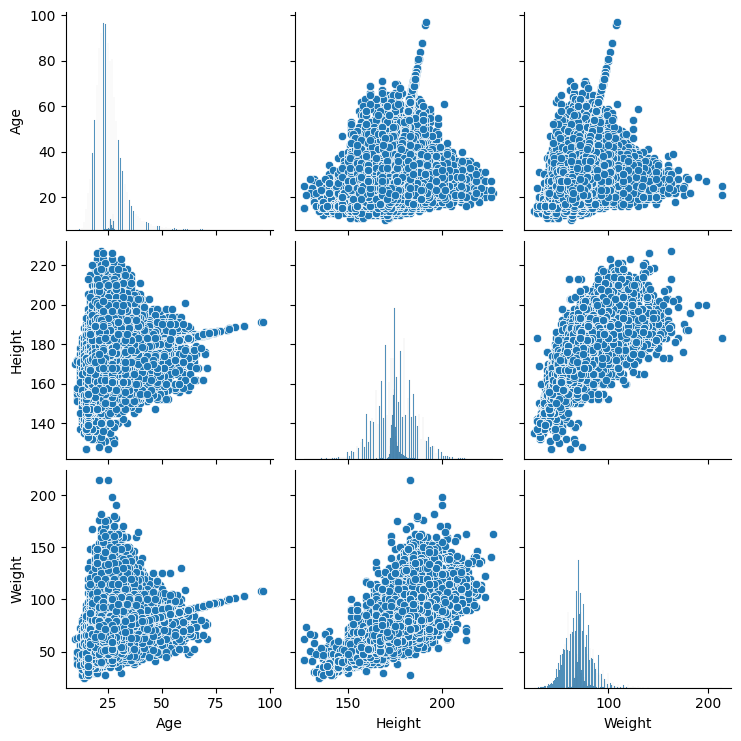

In [ ]:
dfn=olympics[['Age','Height','Weight']]
sns.pairplot(dfn)

### 26. Plot the pairwise relationships of `Age`, `Height`, `Weight`, with different colors for `Sex`

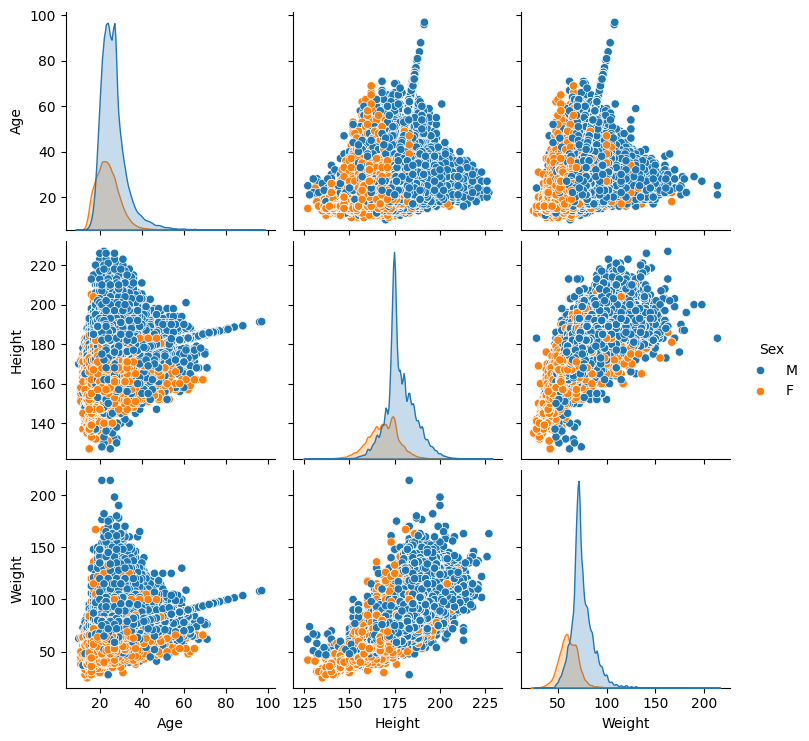

In [ ]:
dfn=olympics[['Age','Height','Weight','Sex']]
sns.pairplot(dfn,hue='Sex')
plt.show()

### 27. Print out the correlation matrix of `Age`, `Height`, `Weight`

In [ ]:
dff=olympics[['Age','Height','Weight']]
print(dff.corr())

             Age    Height    Weight
Age     1.000000  0.161796  0.264409
Height  0.161796  1.000000  0.799259
Weight  0.264409  0.799259  1.000000


### 28. Use heatmap to demonstrate the correlation matrix of `Age`, `Height`, `Weight`, use a colormap (`cmap`) of 'crest'

<Axes: >

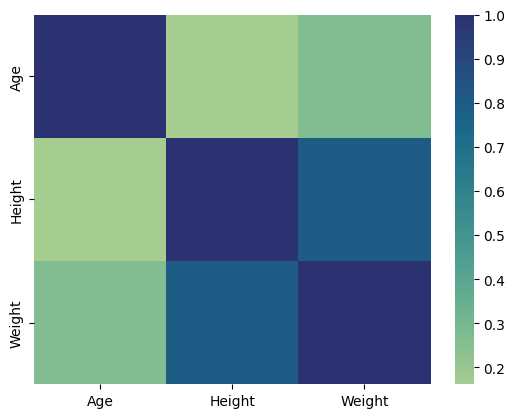

In [ ]:
sns.heatmap(dff.corr(),cmap='crest')

### 29. Plot the histograms of `Age`, with different colors for different `Sex`

<Axes: xlabel='Age', ylabel='Count'>

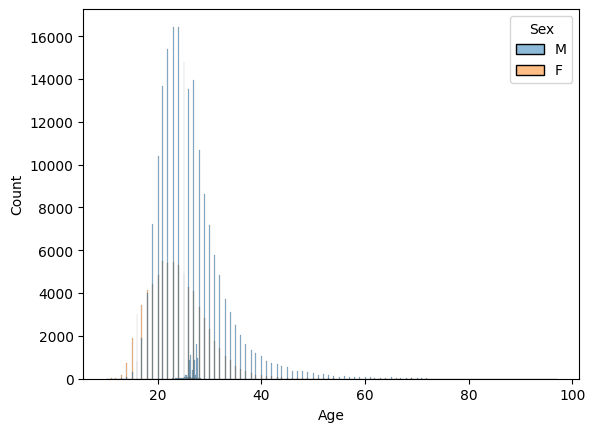

In [ ]:
sns.histplot(data=olympics,x='Age',hue='Sex')

### 30. Plot the histograms of `Age`, on separate plots for different `Sex`

<Axes: title={'center': 'Female'}, xlabel='Age', ylabel='Count'>

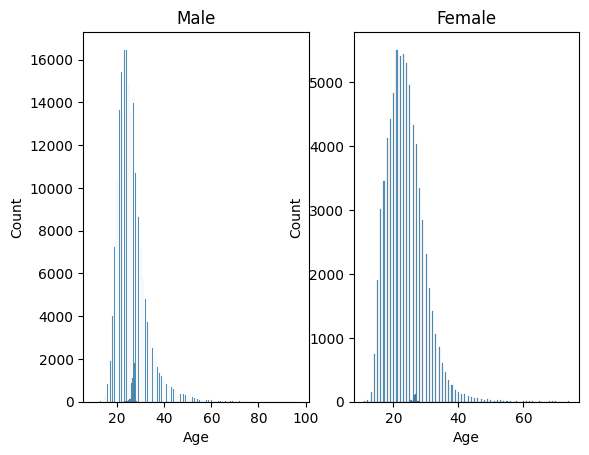

In [ ]:
plt.subplot(1,2,1)
plt.title('Male')
sns.histplot(data=olympics[olympics['Sex']=='M'],x='Age')
plt.subplot(1,2,2)
plt.title('Female')
sns.histplot(data=olympics[olympics['Sex']=='F'],x='Age')

### 31. Look at the changes of average `Age` across `Year` by line charts, with separate lines for different `Season` using different colors

<Axes: xlabel='Year', ylabel='Season'>

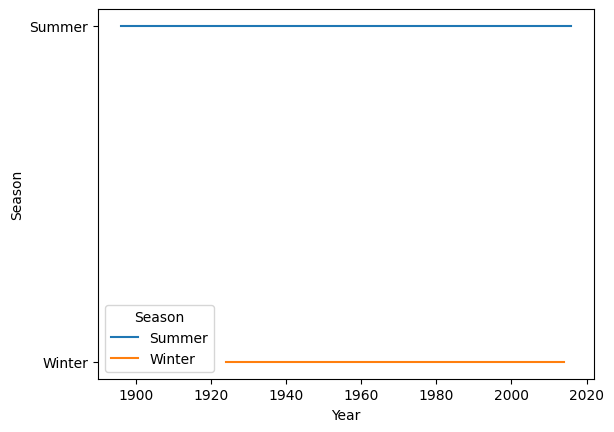

In [ ]:
dfs=olympics.groupby(['Year','Season'])['Age'].mean().reset_index()
sns.lineplot(data=dfs,x='Year',y='Season',hue='Season')

### 32. Look at the distributions of `Age` for different `Sex` using boxplots

<Axes: xlabel='Sex', ylabel='Age'>

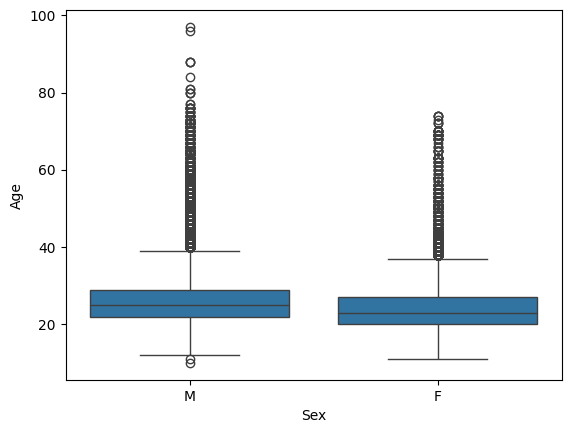

In [ ]:

sns.boxplot(data=olympics,x='Sex',y='Age')

### 33. Look at the distributions of `Age` for different `Sex` using violin plots

<Axes: xlabel='Age', ylabel='Sex'>

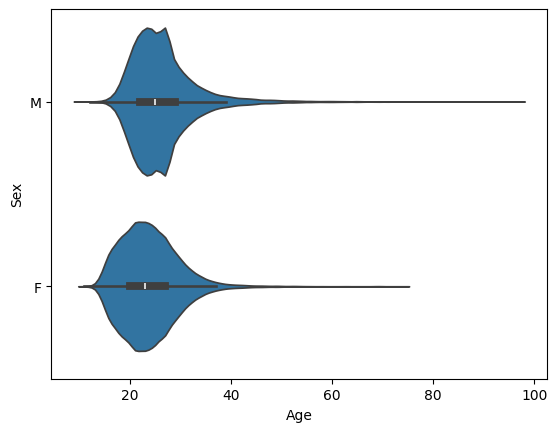

In [ ]:
sns.violinplot(data=olympics, x='Age', y='Sex')

### 34. Look at the distributions of `Age` for different `Sex` using boxplots, with different colors of plots for different `Season`

<Axes: xlabel='Sex', ylabel='Age'>

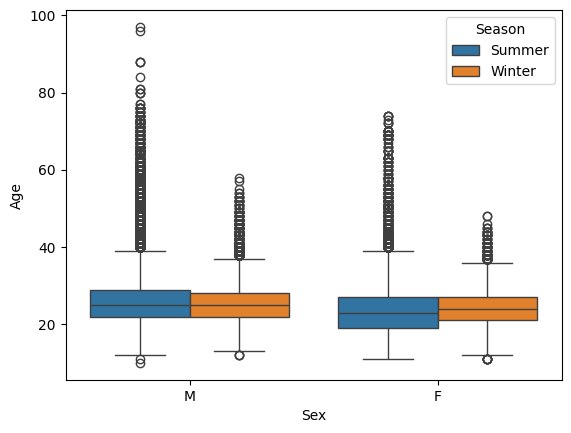

In [ ]:
sns.boxplot(data=olympics,x='Sex',y='Age',hue='Season')

### 35. Use count plots to look at the changes of number of athlete-events across `Year`, for different `Sex` by colors, and different `Season` on separate plots

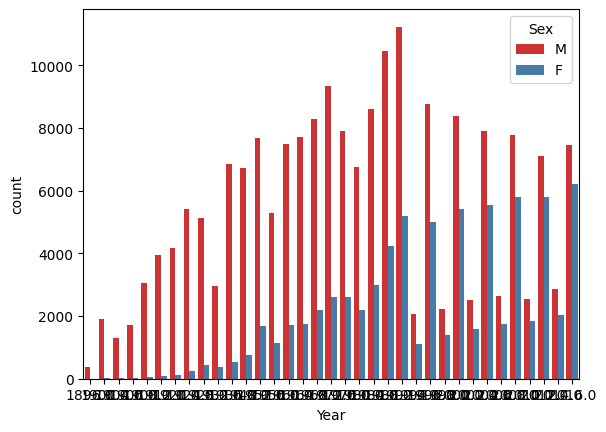

In [ ]:
sns.countplot(data=olympics,x='Year',hue='Sex',palette='Set1',hue_order=['M','F'])
plt.show()